Import the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/CODESOFT Data Sets/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


EDA

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


OBSERVATIONS

*   Minimum sales = 1.6
*   Maximum sales = 27
*   The Maximum sales is coorelated with the TV





In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The data has no null values

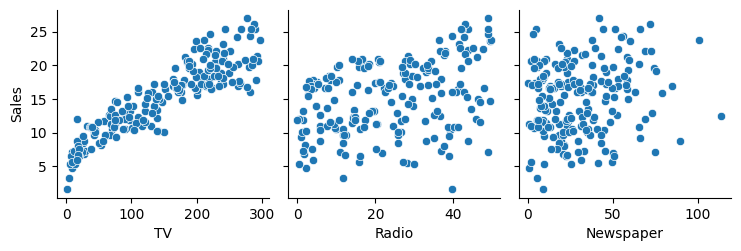

In [8]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()


OBSERVATION:
From the above pair plot we can see that 'TV' is directly propotional to the sales while 'news' and 'radio' are still unpredictible.

In [10]:
# prompt: use variable 'TV' and 'sales' with building an simple linear regression model

import statsmodels.api as sm

# Define the dependent and independent variables
y = df['Sales']
x = df[['TV']]

# Add a constant to the independent variables
x = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 28 May 2024   Prob (F-statistic):           7.93e-74
Time:                        14:13:14   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

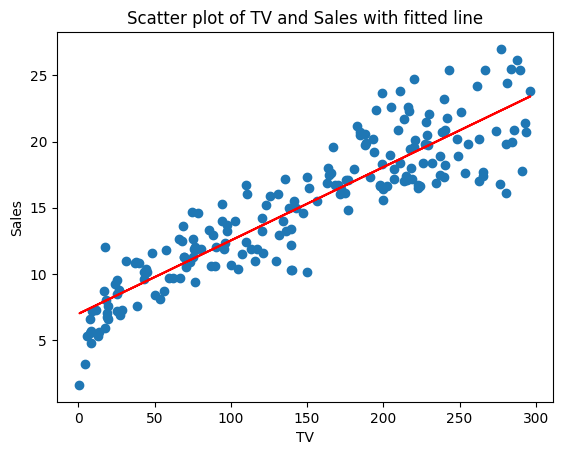

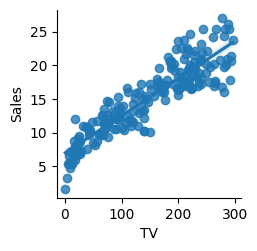

In [11]:
# prompt: visualize the fit of the model using pairplot

import matplotlib.pyplot as plt
# Plot the data and the fitted line
plt.scatter(x['TV'], y)
plt.plot(x['TV'], model.predict(x), color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter plot of TV and Sales with fitted line')
plt.show()

# Create a pairplot with the fitted line
sns.pairplot(df, x_vars=['TV'], y_vars='Sales', kind='reg')
plt.show()


From the above visualization we can see that, in this particular dataset we san predict the sales using the expenditure used on the variable 'TV'

